# seaborn_exercises

In [1]:
import seaborn as sns

## Use the iris database to answer the following quesitons:
1. What does the distribution of petal lengths look like?
2. Is there a correlation between petal length and petal width?
3. Would it be reasonable to predict species based on sepal width and sepal length?
4. Which features would be best used to predict species?

In [11]:
iris_db = sns.load_dataset('iris')

print(f'(rows, columns):{iris_db.shape}')

iris_db.head()

(rows, columns):(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 1. What does the distribution of petal lengths look like?

<AxesSubplot:xlabel='petal_length', ylabel='Count'>

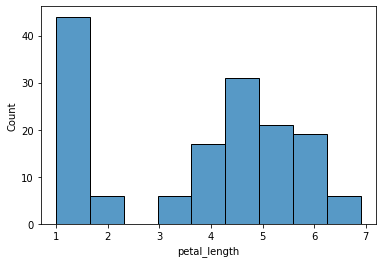

In [19]:
iris_db.petal_length#.head()

sns.histplot(iris_db.petal_length)

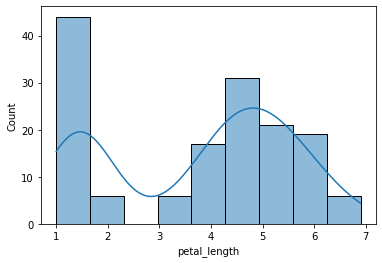

In [23]:
iris_db.petal_length#.head()

sns.histplot(iris_db.petal_length, kde=True)

import matplotlib.pyplot as plt
plt.show()

### 2. Is there a correlation between petal length and petal width?

In [24]:
iris_db.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


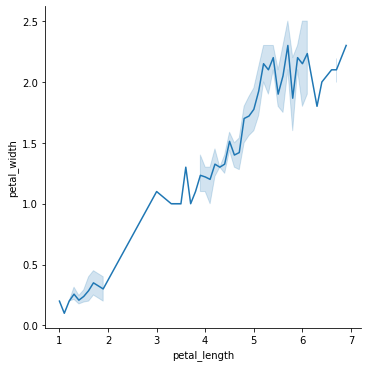

In [26]:
#seaborn line plot
sns.relplot(data = iris_db, x = 'petal_length', y = 'petal_width', 
           kind = 'line')

### 3. Would it be reasonable to predict species based on sepal width and sepal length?

     sepal_width  sepal_length    species
0            3.5           5.1     setosa
1            3.0           4.9     setosa
2            3.2           4.7     setosa
3            3.1           4.6     setosa
4            3.6           5.0     setosa
..           ...           ...        ...
145          3.0           6.7  virginica
146          2.5           6.3  virginica
147          3.0           6.5  virginica
148          3.4           6.2  virginica
149          3.0           5.9  virginica

[150 rows x 3 columns]


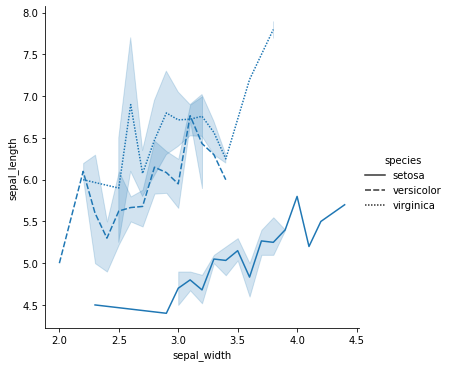

In [72]:
#iris_db.species.str.replace['s']

pred_spec_df = iris_db[['sepal_width', 'sepal_length', 'species']]
print(pred_spec_df)

sns.relplot(data = pred_spec_df, x = 'sepal_width', y = 'sepal_length', 
          kind = 'line', 
            style = 'species')

In [71]:
pred_width = iris_db[['sepal_width', 'species']]
pred_length = iris_db[['sepal_length', 'species']]

pred_width.corr()

,sepal_width
sepal_width,1.0


### 4. Which features would be best used to predict species?

In [74]:
iris_db.species.value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

In [83]:
print(iris_db[iris_db.species.str.startswith('vir')].head(3))

print(iris_db[iris_db.species.str.startswith('ver')].head(3))

print(iris_db[iris_db.species.str.startswith('s')].head(3))

     sepal_length  sepal_width  petal_length  petal_width    species
100           6.3          3.3           6.0          2.5  virginica
101           5.8          2.7           5.1          1.9  virginica
102           7.1          3.0           5.9          2.1  virginica
    sepal_length  sepal_width  petal_length  petal_width     species
50           7.0          3.2           4.7          1.4  versicolor
51           6.4          3.2           4.5          1.5  versicolor
52           6.9          3.1           4.9          1.5  versicolor
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa


<hr style="border:1px solid black"> </hr>

## 1. Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. 
- a. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?
- b. Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

In [85]:
ans_df = sns.load_dataset('anscombe')
ans_df.shape

(44, 3)

In [94]:
from pydataset import data

#data('anscombe', show_doc=True)
print(ans_df.value_counts('dataset'))
print(ans_df.head())

dataset
I      11
II     11
III    11
IV     11
dtype: int64
  dataset     x     y
0       I  10.0  8.04
1       I   8.0  6.95
2       I  13.0  7.58
3       I   9.0  8.81
4       I  11.0  8.33


In [95]:
#1a. a. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. 
    #What do you notice?
ans_df.describe()

,x,y
count,44.000000,44.000000
mean,9.000000,7.500682
std,3.198837,1.958925
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


In [116]:
ans_df[['x', 'y', 'dataset']].groupby(by='dataset').agg(['count', 'mean', 'min', 'max'])

# *****************OBSERVATIONS:********************************************
# for x:
    # all datasets have same mean
    # datasets I - III have same min and max
        # dataset IV has a higher min and max than I - III
#for y: 
    # datasets I, II, and IV have same mean
        # dataset III has a mean slightly lower than that of the other 3
    # all 4 datasets have different min's and max's, with datasets III and IV being fairly close in number

#across all 
    # x_means > y_ranges across all datasets
    # x_ranges > y_ranges across all datasets


x                     y                       
        count mean  min   max count      mean   min    max
dataset                                                   
I          11  9.0  4.0  14.0    11  7.500909  4.26  10.84
II         11  9.0  4.0  14.0    11  7.500909  3.10   9.26
III        11  9.0  4.0  14.0    11  7.500000  5.39  12.74
IV         11  9.0  8.0  19.0    11  7.500909  5.25  12.50

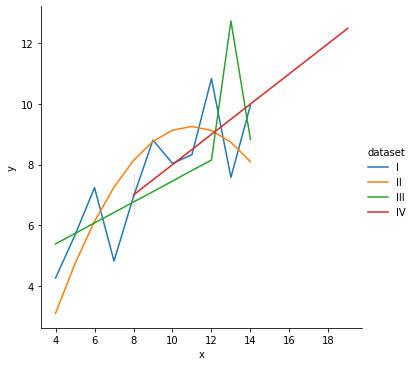

In [127]:
# 1b.Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

sns.relplot(data = ans_df, x = 'x', y = 'y',
           hue = 'dataset',
           kind = 'line')

## 2. Load the InsectSprays dataset and read it's documentation. 
- Create a boxplot that shows the effectiveness of the different insect sprays.

In [141]:
# insect_spr_df = sns.load_dataset('InsectSprays')
from pydataset import data
data("InsectSprays")


# insect_spr_df = sns.load_dataset('InsectSprays')
    # got error: dataset not part of example datasets

insect_spr_df = data("InsectSprays")

In [142]:
insect_spr_df.head(3)

,count,spray
1,10,A
2,7,A
3,20,A


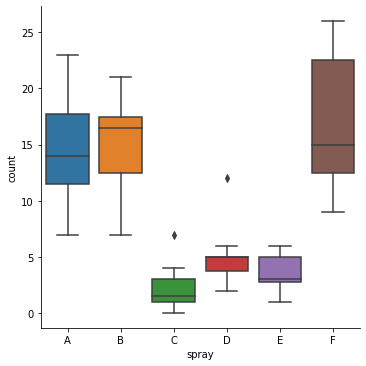

In [146]:
sns.catplot(data = insect_spr_df, x = 'spray', y = 'count',
           kind = 'box')